In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import imutils

In [ ]:
img = cv.imread('pictures/books1.jpg')
img_bin = cv.imread('pictures/book_1_bin.jpg', 0)

In [ ]:
fig = plt.figure(figsize=(16,12))
plt.imshow(img_bin, cmap='gray')
plt.show()

In [ ]:
contours, hierarchy = cv.findContours(img_bin, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In [ ]:
# result = cv.drawContours(img, contours, -1, (0, 255, 0), 3)

In [ ]:
#fig = plt.figure(figsize=(16,12))
#plt.imshow(result)
#plt.show()

In [ ]:
contour_areas = list(map(cv.contourArea, contours))
sorted_contours = sorted(contours, key=lambda x: cv.contourArea(x), reverse=True)

In [ ]:
plt.figure(figsize=(18,12))
plt.hist(list(filter(lambda x: x > 50000, contour_areas)))
plt.show()

In [ ]:
largest_contours = sorted_contours[:6]

In [ ]:
#result_largest = cv.drawContours(img, largest_contours, -1, (255, 0, 0), 3)

#plt.figure(figsize=(16,12))
#plt.imshow(result_largest)
#plt.show()

In [ ]:
approximated_contours = []

for contour in largest_contours: 
    epsilon = 0.05 * cv.arcLength(contour, True)
    approx = cv.approxPolyDP(contour, epsilon, True)
    approximated_contours.append(approx)

In [ ]:
result_approx_contours = cv.drawContours(img, approximated_contours, -1, (0, 0, 255), 3)

plt.figure(figsize=(16,12))
plt.imshow(result_approx_contours)
plt.show()

In [8]:
img_cropped = cv.imread('pictures/book1_bin_cropped.jpg', 0)
contours, hierarchy = cv.findContours(img_cropped, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contour_areas = list(map(cv.contourArea, contours))
sorted_contours = sorted(contours, key=lambda x: cv.contourArea(x), reverse=True)
largest_contours = sorted_contours[:6]

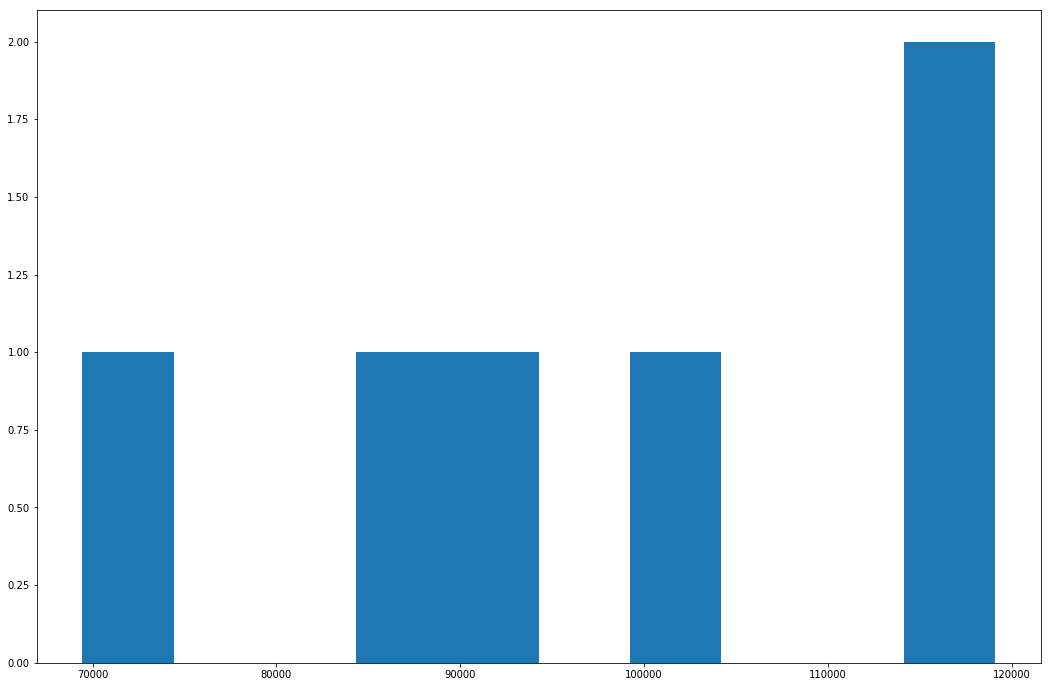

In [9]:
plt.figure(figsize=(18,12))
plt.hist(list(filter(lambda x: x > 50000, contour_areas)))
plt.show()

In [16]:
approximated_contours = []

for contour in largest_contours: 
    epsilon = 0.05 * cv.arcLength(contour, True)
    approx = cv.approxPolyDP(contour, epsilon, True)
    approximated_contours.append(approx)

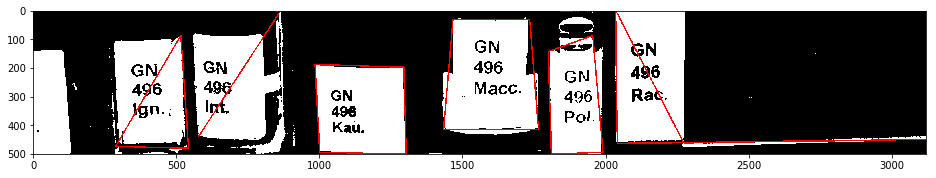

In [17]:
result_approx_contours = cv.drawContours(cv.cvtColor(img_cropped,cv.COLOR_GRAY2RGB), approximated_contours, -1, (255, 0, 0), 3)

plt.figure(figsize=(16,12))
plt.imshow(result_approx_contours)
plt.show()

In [26]:
result_rectangles = cv.cvtColor(img_cropped,cv.COLOR_GRAY2RGB)

for contour in approximated_contours:
    (x,y,w,h) = cv.boundingRect(contour)
    result_rectangles = cv.rectangle(result_rectangles, (x,y), (x+w,y+h), (0,255,0), 2)

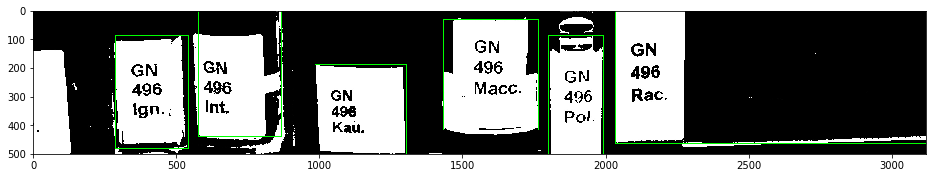

In [27]:
plt.figure(figsize=(16,12))
plt.imshow(result_rectangles)
plt.show()